In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Esercizio 1

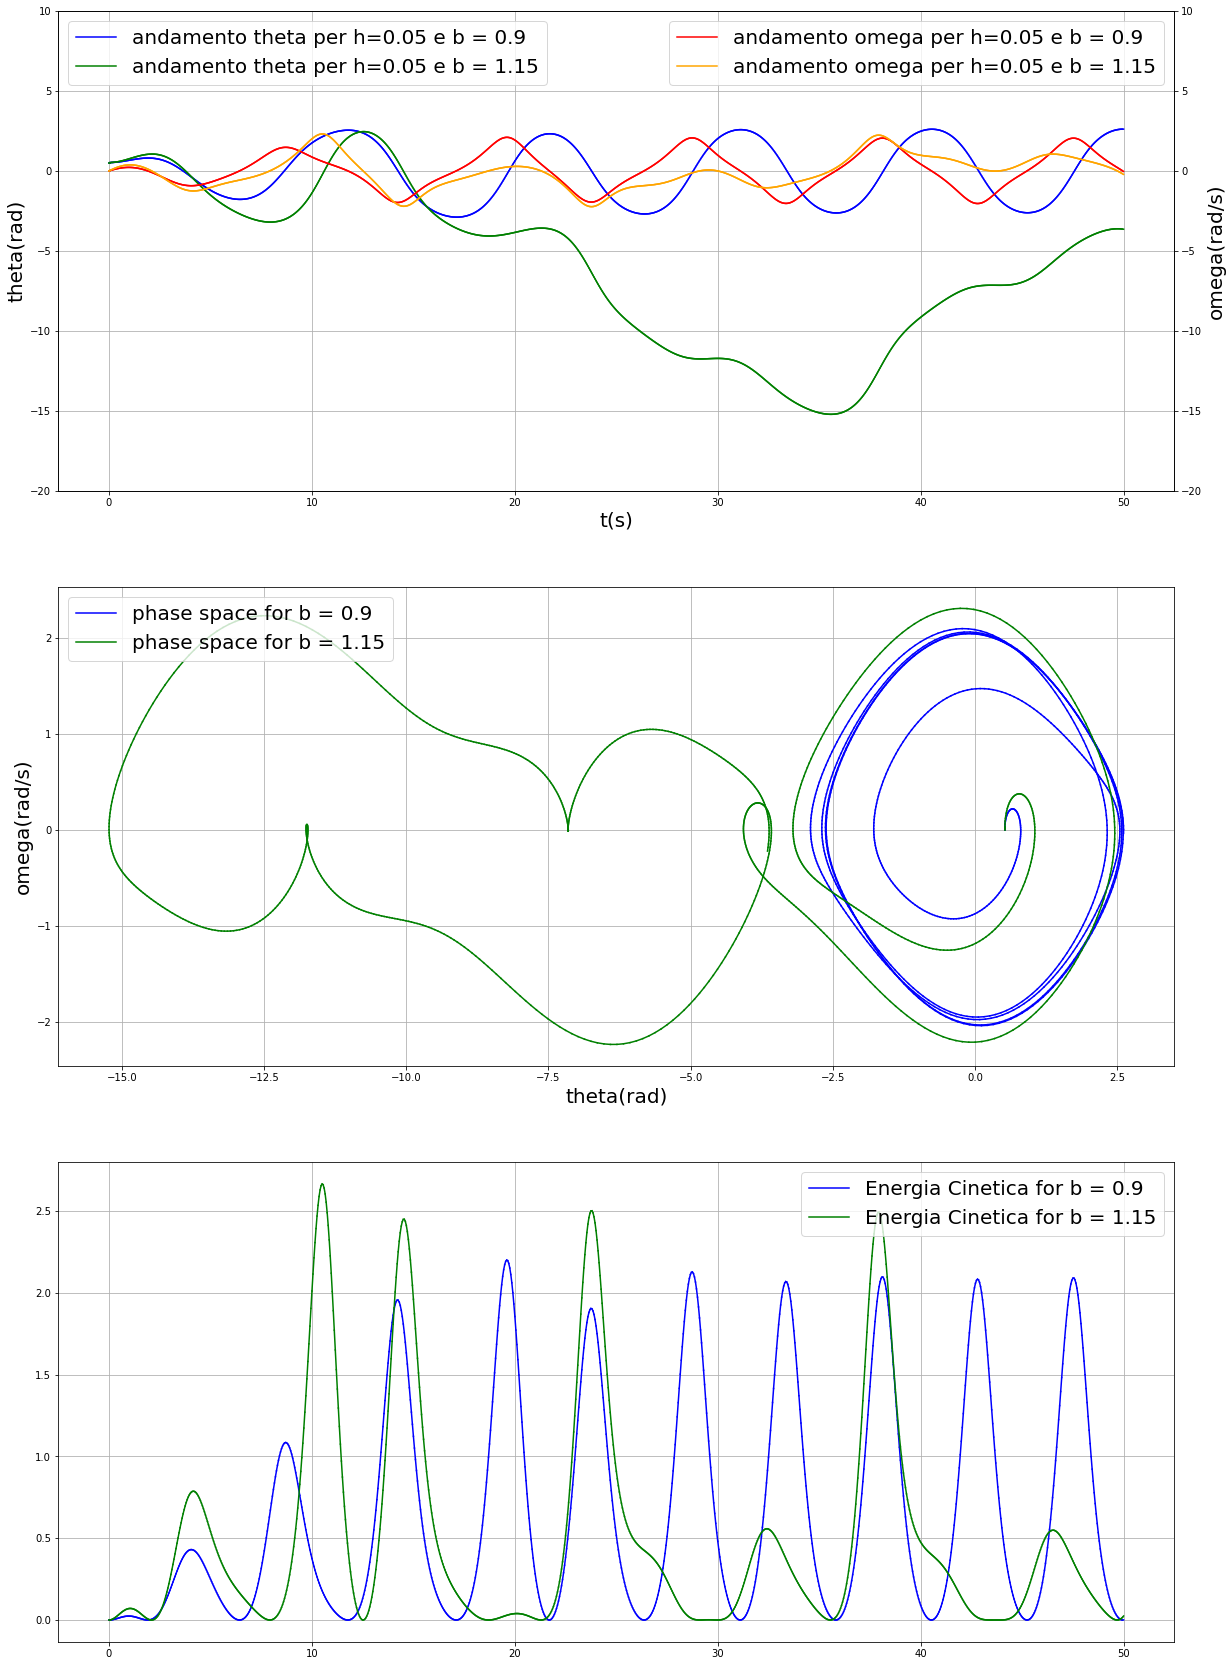

Tempo di elaborazione:  7.118274450302124 (s)


In [12]:
t_start = time()
w0, q, b, b1 = 2./3, 0.5, 0.9, 0.95


def f_theta(t, theta, omega):
    return omega
def f_omega(t, theta, omega, b):
    return b*np.cos(w0*t)-np.sin(theta)-q*omega
    
#print(f_omega(0, np.pi/3, 0))

def RK4(h, color1, color2, b, a=1):
    t = 0
    theta0, omega0 = np.pi/6, 0
    theta, omega = theta0, omega0
    while t+h<=50:
        theta_prev, omega_prev = theta, omega
        k_1theta = h * f_theta(t, theta_prev, omega_prev)
        k_2theta = h * f_theta(t+h/2, theta_prev+k_1theta/2, omega_prev+k_1theta/2)
        k_3theta = h * f_theta(t+h/2, theta_prev+k_2theta/2, omega_prev+k_2theta/2) 
        k_4theta = h * f_theta(t+h, theta_prev+k_3theta, omega_prev+k_3theta) 
        
        k_1omega = h * f_omega(t, theta_prev, omega_prev, b)
        k_2omega = h * f_omega(t+h/2, theta_prev+k_1omega/2, omega_prev+k_1omega/2, b)
        k_3omega = h * f_omega(t+h/2, theta_prev+k_2omega/2, omega_prev+k_2omega/2, b) 
        k_4omega = h * f_omega(t+h, theta_prev+k_3omega, omega_prev+k_3omega, b) 
        
        theta_next=theta_prev+(k_1theta+2*k_2theta+2*k_3theta+k_4theta)/6
        omega_next=omega_prev+(k_1omega+2*k_2omega+2*k_3omega+k_4omega)/6
        
        if a == 1:
            ax1.plot([t,t+h], [theta_prev, theta_next], color = color1)  
            ax3.plot([t,t+h], [omega_prev, omega_next], color = color2)
            ax2.plot([theta_prev, theta_next], [omega_prev, omega_next], color = color1)
            ax4.plot([t, t+h], [omega_prev**2/2, omega_next**2/2], color=color1)
            if t == 0:
                ax1.plot([t,t+h], [theta_prev, theta_next], color = color1, label = "andamento theta per h={} e b = {}".format(h, b))  
                ax3.plot([t,t+h], [omega_prev, omega_next], color = color2, label = "andamento omega per h={} e b = {}".format(h, b))
                ax2.plot([theta_prev, theta_next], [omega_prev, omega_next], color = color1, label = "phase space for b = {}".format(b))
                ax4.plot([t, t+h], [omega_prev**2/2, omega_next**2/2], color=color1, label = "Energia Cinetica for b = {}".format(b) )
        
        theta, omega = theta_next, omega_next
        
        t+=h
        
        
fig, (ax1,ax2,ax4)=plt.subplots(3,1, figsize = (20, 30))

ax3=ax1.twinx()
plot = RK4(0.05, "blue", "red", b=0.9)
plot2 = RK4(0.05, "green", "orange", b=1.15)
ax1.set_xlabel("t(s)", fontsize = 20)
ax1.set_ylim(-20, 10)
ax3.set_ylim(-20, 10)
ax1.legend(loc = "upper left", fontsize = 20)
ax2.legend(loc = "upper left", fontsize = 20)
ax3.legend(loc= "upper right", fontsize = 20)
ax4.legend(loc= "upper right", fontsize = 20)
ax1.set_ylabel("theta(rad)", fontsize = 20)
ax3.set_ylabel("omega(rad/s)", fontsize = 20)

ax2.set_xlabel("theta(rad)", fontsize = 20)
ax2.set_ylabel("omega(rad/s)", fontsize = 20)
ax1.grid()
ax2.grid()
ax4.grid()

plt.show()
print("Tempo di elaborazione: ", time()-t_start, "(s)")


# Esercizio 2

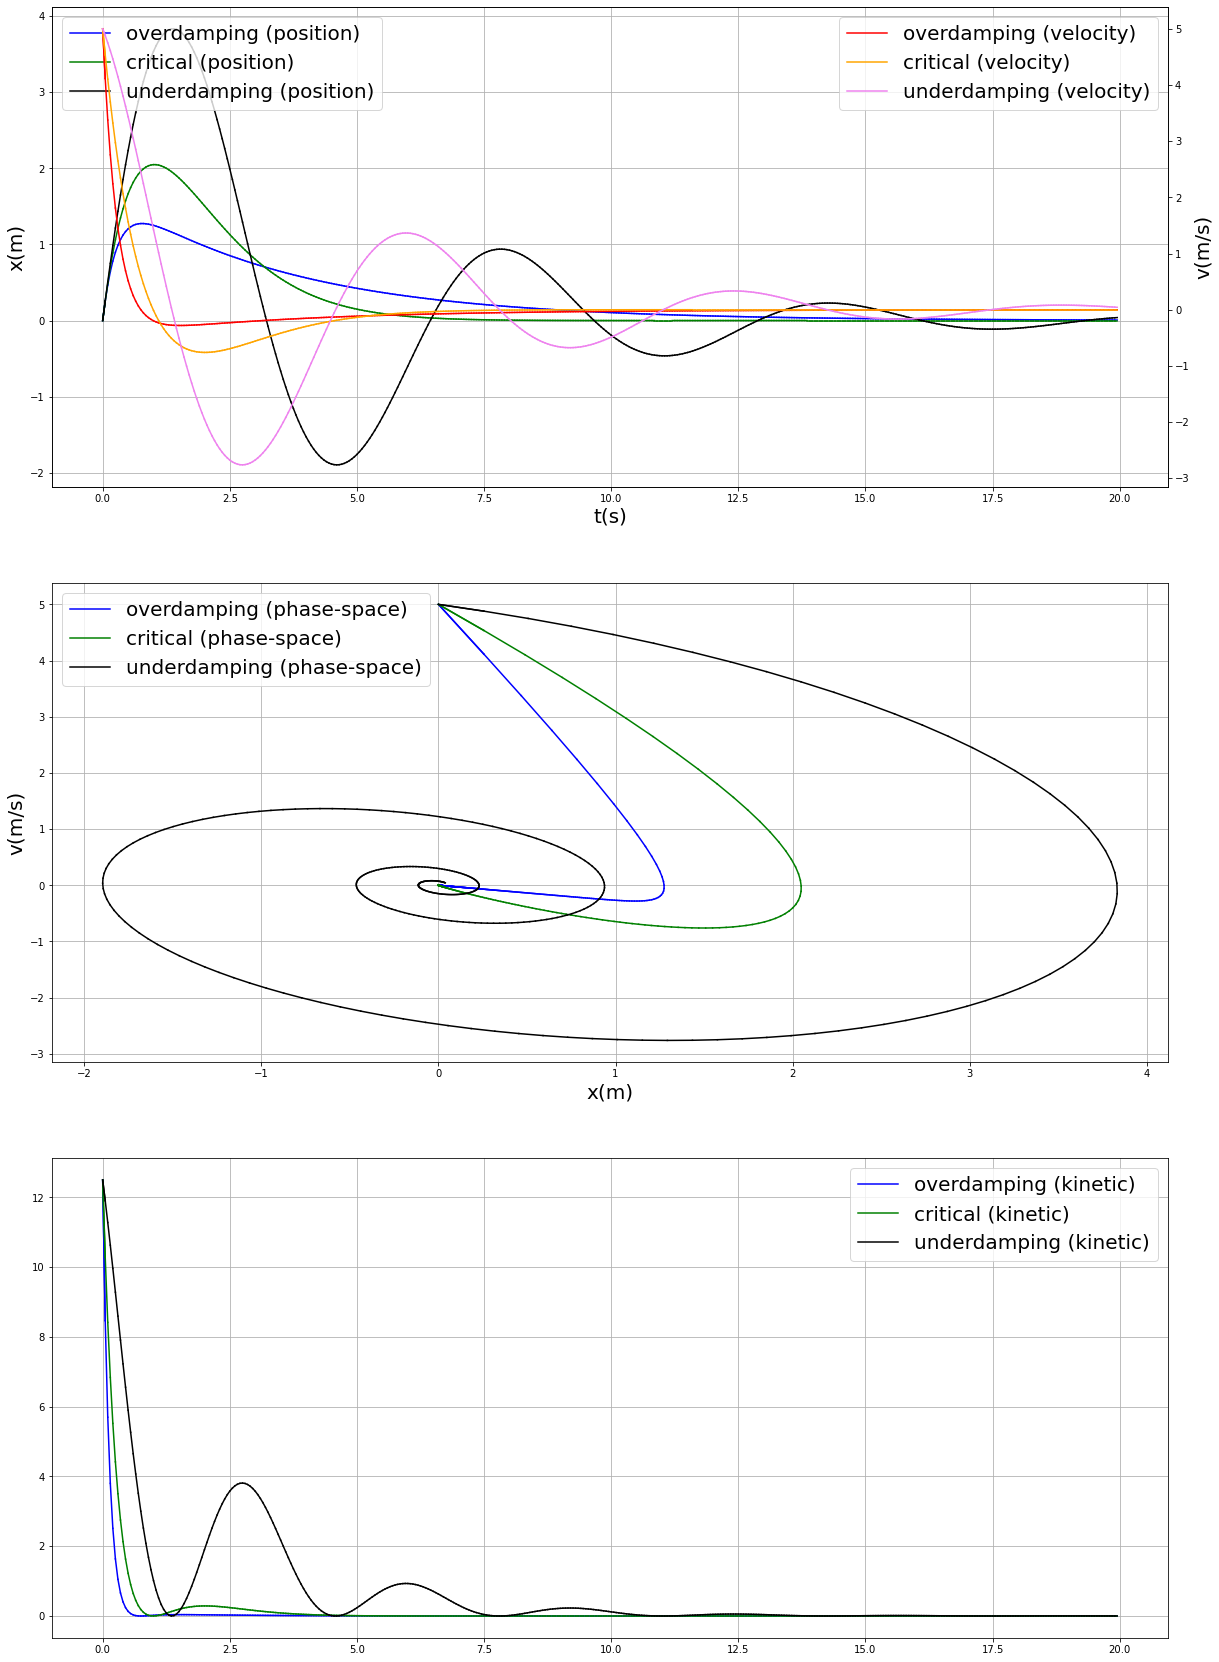

Tempo di elaborazione:  2.6936323642730713 (s)


In [3]:
t_start = time()
def f_x(t, x, y, m = 1, k = 1):
    return y
def f_y(t, x, y, c, m = 1, k = 1):
    return (-k*x-c*y)/m


def RK4(h, color1, color2, c, a=1, m = 1., k = 1.):
    c = c
    t = 0
    x0, y0 = 0, 5
    x, y = x0, y0
    while t+h<=20:
        x_prev, y_prev = x, y
        k_1x = h * f_x(t, x_prev, y_prev)
        k_2x = h * f_x(t+h/2, x_prev+k_1x/2, y_prev+k_1x/2)
        k_3x = h * f_x(t+h/2, x_prev+k_2x/2, y_prev+k_2x/2) 
        k_4x = h * f_x(t+h, x_prev+k_3x, y_prev+k_3x) 
        
        k_1y = h * f_y(t, x_prev, y_prev, c)
        k_2y = h * f_y(t+h/2, x_prev+k_1y/2, y_prev+k_1y/2, c)
        k_3y = h * f_y(t+h/2, x_prev+k_2y/2, y_prev+k_2y/2, c) 
        k_4y = h * f_y(t+h, x_prev+k_3y, y_prev+k_3y, c) 
        
        x_next=x_prev+(k_1x+2*k_2x+2*k_3x+k_4x)/6
        y_next=y_prev+(k_1y+2*k_2y+2*k_3y+k_4y)/6
        
        if a == 1:
            ax1.plot([t,t+h], [x_prev, x_next], color = color1)  # position vs time
            ax3.plot([t,t+h], [y_prev, y_next], color = color2)  #velocity vs time
            ax2.plot([x_prev, x_next], [y_prev, y_next], color = color1) #position vs velocity
            ax4.plot([t, t+h], [y_prev**2/2, y_next**2/2], color=color1) #Kinetic
            if t == 0:
                if c**2>4*m*k:
                    st = "overdamping ({})"
                elif c**2==4*m*k:
                    st = "critical ({})"
                else: 
                    st = "underdamping ({})"
                ax1.plot([t,t+h], [x_prev, x_next], color = color1, label = st.format("position"))  
                ax3.plot([t,t+h], [y_prev, y_next], color = color2, label = st.format("velocity"))
                ax2.plot([x_prev, x_next], [y_prev, y_next], color = color1, label = st.format("phase-space"))
                ax4.plot([t, t+h], [y_prev**2/2, y_next**2/2], color=color1, label = st.format("kinetic"))
        
        x, y = x_next, y_next
        
        t+=h

fig, (ax1,ax2,ax4)=plt.subplots(3,1, figsize = (20, 30))

ax3=ax1.twinx()
plot = RK4(0.05, "blue", "red", c=4)
plot2 = RK4(0.05, "green", "orange", c=2.)
plot3 = RK4(0.05, "black", "violet", c=0.5)
ax1.set_xlabel("t(s)", fontsize = 20)
#ax1.set_ylim(-20, 10)
#ax3.set_ylim(-20, 10)
ax1.legend(loc = "upper left", fontsize = 20)
ax2.legend(loc = "upper left", fontsize = 20)
ax3.legend(loc= "upper right", fontsize = 20)
ax4.legend(loc= "upper right", fontsize = 20)
ax1.set_ylabel("x(m)", fontsize = 20)
ax3.set_ylabel("v(m/s)", fontsize = 20)

ax2.set_xlabel("x(m)", fontsize = 20)
ax2.set_ylabel("v(m/s)", fontsize = 20)
ax1.grid()
ax2.grid()
ax4.grid()

plt.show()
print("Tempo di elaborazione: ", time()-t_start, "(s)")



# Esercizio 3

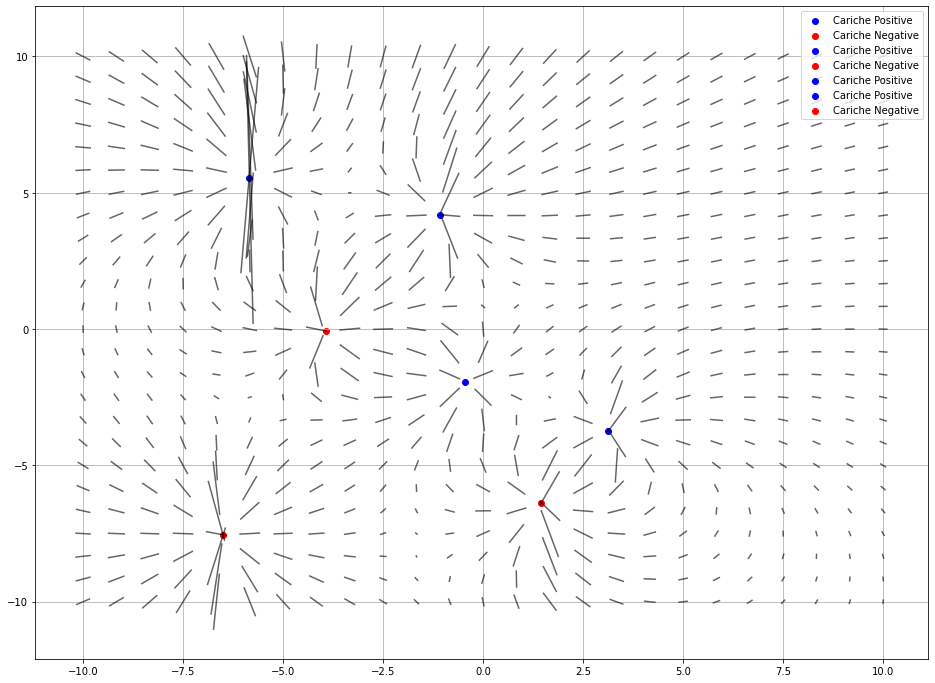

Tempo di elaborazione:  2.6582019329071045 (s)


In [5]:
import random
random.seed(a=1)
t_start = time()
q = 0.001
def d(x,y, x0, y0):
    return np.sqrt((x-x0)**2+(y-y0)**2) #origin in 0,0
N = 4
charges = [[random.random()*16-8, random.random()*16-8, random.choice([q, -q])] for i in range(N)]
#print(charges)

def Ex(x, y, x0, y0, q):
    return (q/(4*np.pi*8.85*10**(-12)))*(x-x0)/(d(x, y, x0, y0)**3)
def Ey(x, y, x0, y0, q):
    return (q/(4*np.pi*8.85*10**(-12)))*(y-y0)/(d(x, y, x0, y0)**3)
def E(x, y, x0, y0, q):
    return np.sqrt(Ex(x, y, x0, y0, q)**2+Ex(x, y, x0, y0, q)**2)


plt.figure(figsize=(16,12))

I = np.linspace(-10, 10, 25)


for i in I:
    x = i
    for j in I:
        y = j
        Ex_tot = 0
        Ey_tot = 0
        E_tot = 0
        for k in range(N):
            #c = 0.000000000000000000001*E(x,y,charges[k][0], charges[k][1], charges[k][2])
            #plt.scatter(x,y, color = "black", alpha=0.1)
            Ex_tot += Ex(x,y,charges[k][0], charges[k][1], charges[k][2])
            Ey_tot += Ey(x,y,charges[k][0], charges[k][1], charges[k][2])
            E_tot += E(x,y,charges[k][0], charges[k][1], charges[k][2])
            
        #print(E_tot)
        c = .7
        plt.plot([x-0.5*c*Ex_tot/E_tot, x+0.5*c*Ex_tot/E_tot], [y-0.5*c*Ey_tot/E_tot, y+0.5*c*Ey_tot/E_tot], color="black", alpha = 0.6)
            
for i in range(N):
    if charges[i][2]<0:
        plt.scatter(charges[i][0], charges[i][1], color="red", label="Cariche Negative")
    else:
        plt.scatter(charges[i][0], charges[i][1], color="blue", label= "Cariche Positive")               
plt.grid()
plt.legend()
plt.show()

print("Tempo di elaborazione: ", time()-t_start, "(s)")

# Esercizio 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


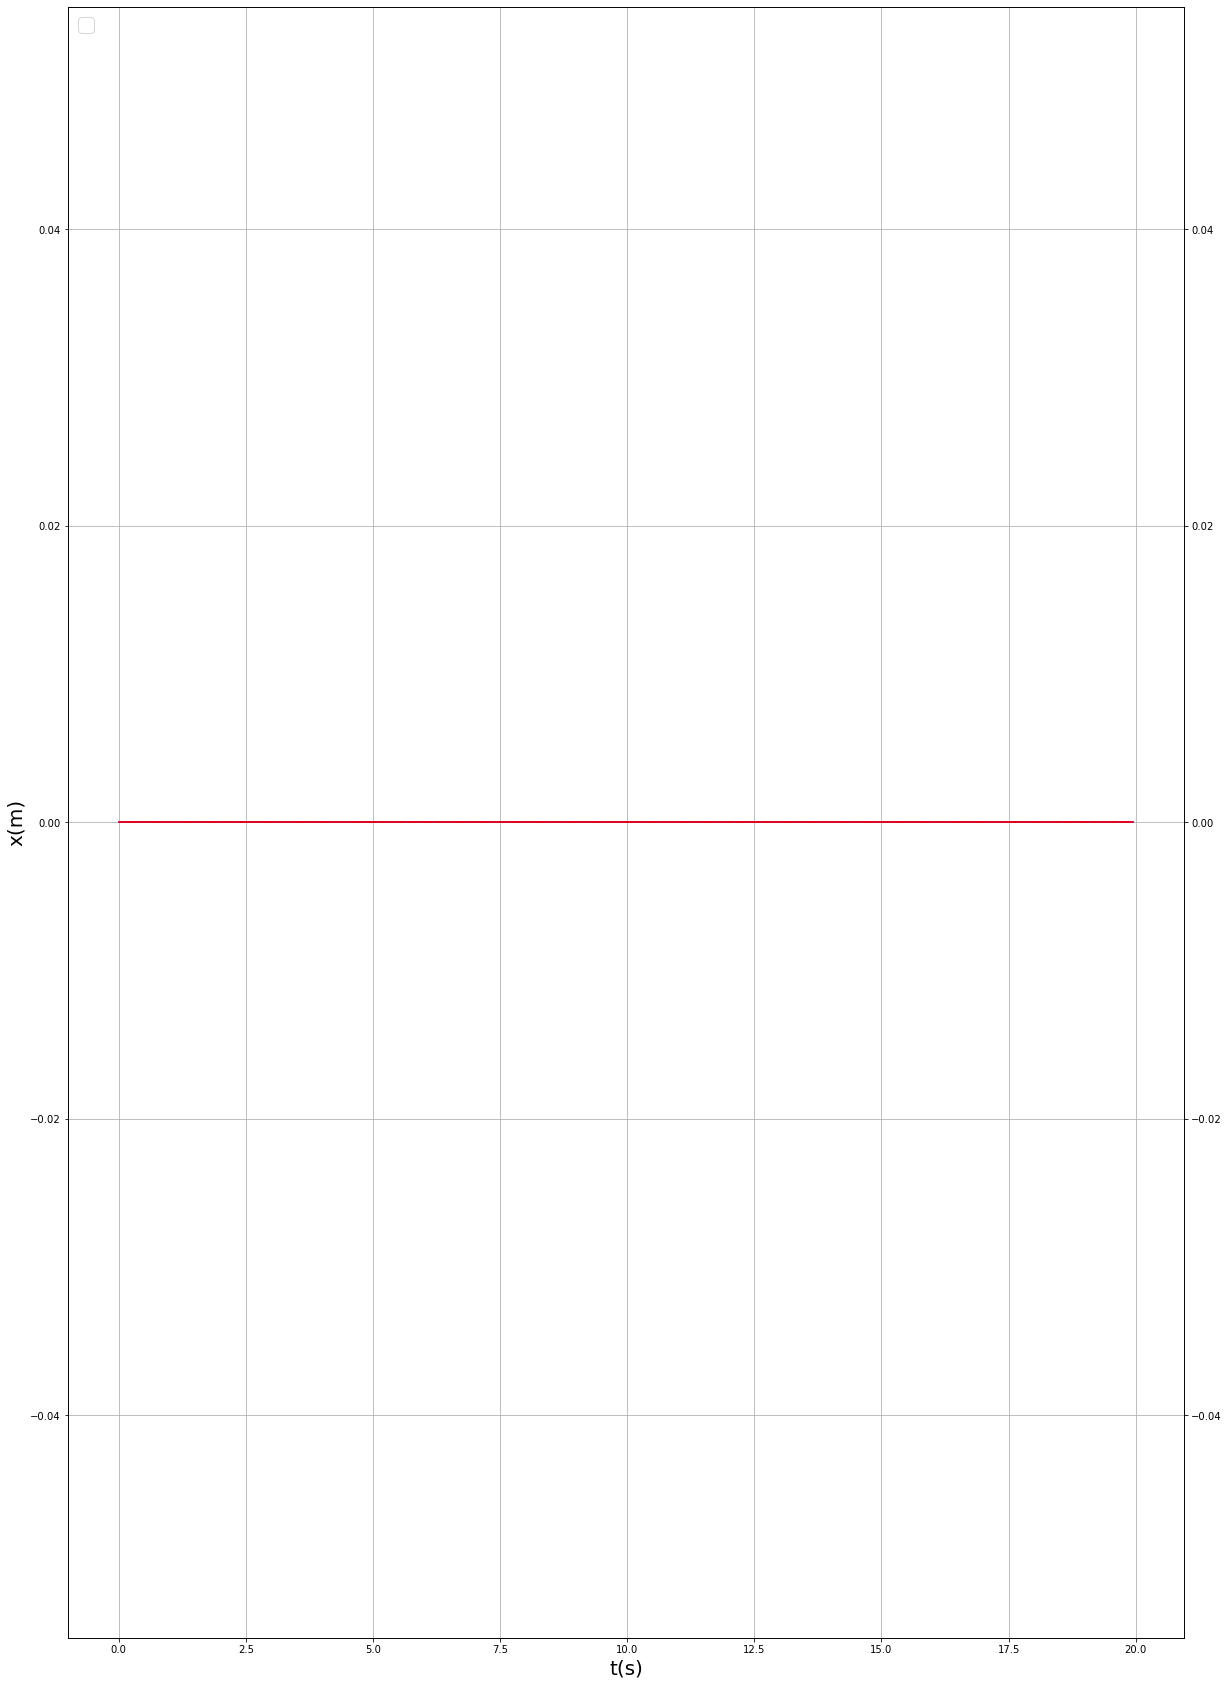

Tempo di elaborazione:  1.0702743530273438 (s)


In [15]:
t_start = time()
B=1
qe = 1.6*10**(-19)
me = 9.11*10**(-31)
# Caso B ortogonale e gamma = 0, E = 0
def f_v(t, x, v, B=B,  q = qe, m = me, E=0):
    return (q/m)*v*B+E
def f_x(t, x, v):
    return v

# assumiamo B lungo z, f lungo v, quindi F lungo x
def RK4(h, color1, color2, B=B, a=1 ):
    t = 0
    x0, v0 = 0, 0
    x, v = x0, v0
    while t+h<=20:
        x_prev, v_prev = x, v
        k_1x = h * f_x(t, x_prev, v_prev)
        k_2x = h * f_x(t+h/2, x_prev+k_1x/2, v_prev+k_1x/2)
        k_3x = h * f_x(t+h/2, x_prev+k_2x/2, v_prev+k_2x/2) 
        k_4x = h * f_x(t+h, x_prev+k_3x, v_prev+k_3x) 
        
        k_1v = h * f_v(t, x_prev, v_prev, c)
        k_2v = h * f_v(t+h/2, x_prev+k_1v/2, v_prev+k_1v/2, c)
        k_3v = h * f_v(t+h/2, x_prev+k_2v/2, v_prev+k_2v/2, c) 
        k_4v = h * f_v(t+h, x_prev+k_3v, v_prev+k_3v, c) 
        
        x_next=x_prev+(k_1x+2*k_2x+2*k_3x+k_4x)/6
        v_next=v_prev+(k_1v+2*k_2v+2*k_3v+k_4v)/6
        
        if a == 1:
            ax1.plot([t,t+h], [x_prev, x_next], color = color1)  # position vs time
            ax3.plot([t,t+h], [v_prev, v_next], color = color2)  #velocitv vs time
            ax2.plot([x_prev, x_next], [v_prev, v_next], color = color1) #position vs velocitv
            ax4.plot([t, t+h], [v_prev**2/2, v_next**2/2], color=color1) #Kinetic
        
        x, v = x_next, v_next
        
        t+=h

fig, (ax1)=plt.subplots(1,1, figsize = (20, 30))

ax3=ax1.twinx()
plot = RK4(0.05, "blue", "red", B=1)
ax1.set_xlabel("t(s)", fontsize = 20)
#ax1.set_ylim(-20, 10)
#ax3.set_ylim(-20, 10)
ax1.legend(loc = "upper left", fontsize = 20)
#ax2.legend(loc = "upper left", fontsize = 20)
#ax3.legend(loc= "upper right", fontsize = 20)
#ax4.legend(loc= "upper right", fontsize = 20)
ax1.set_ylabel("x(m)", fontsize = 20)
#ax3.set_ylabel("v(m/s)", fontsize = 20)

#ax2.set_xlabel("x(m)", fontsize = 20)
#ax2.set_ylabel("v(m/s)", fontsize = 20)
ax1.grid()
#ax2.grid()
#ax4.grid()

plt.show()
print("Tempo di elaborazione: ", time()-t_start, "(s)")

